In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("data/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
df.drop(columns="A_id",axis=1,inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [11]:
df[df['Quality'].isna()]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [12]:
df.dropna(inplace=True)

In [13]:
df['Acidity']=df['Acidity'].astype(float)

<AxesSubplot:>

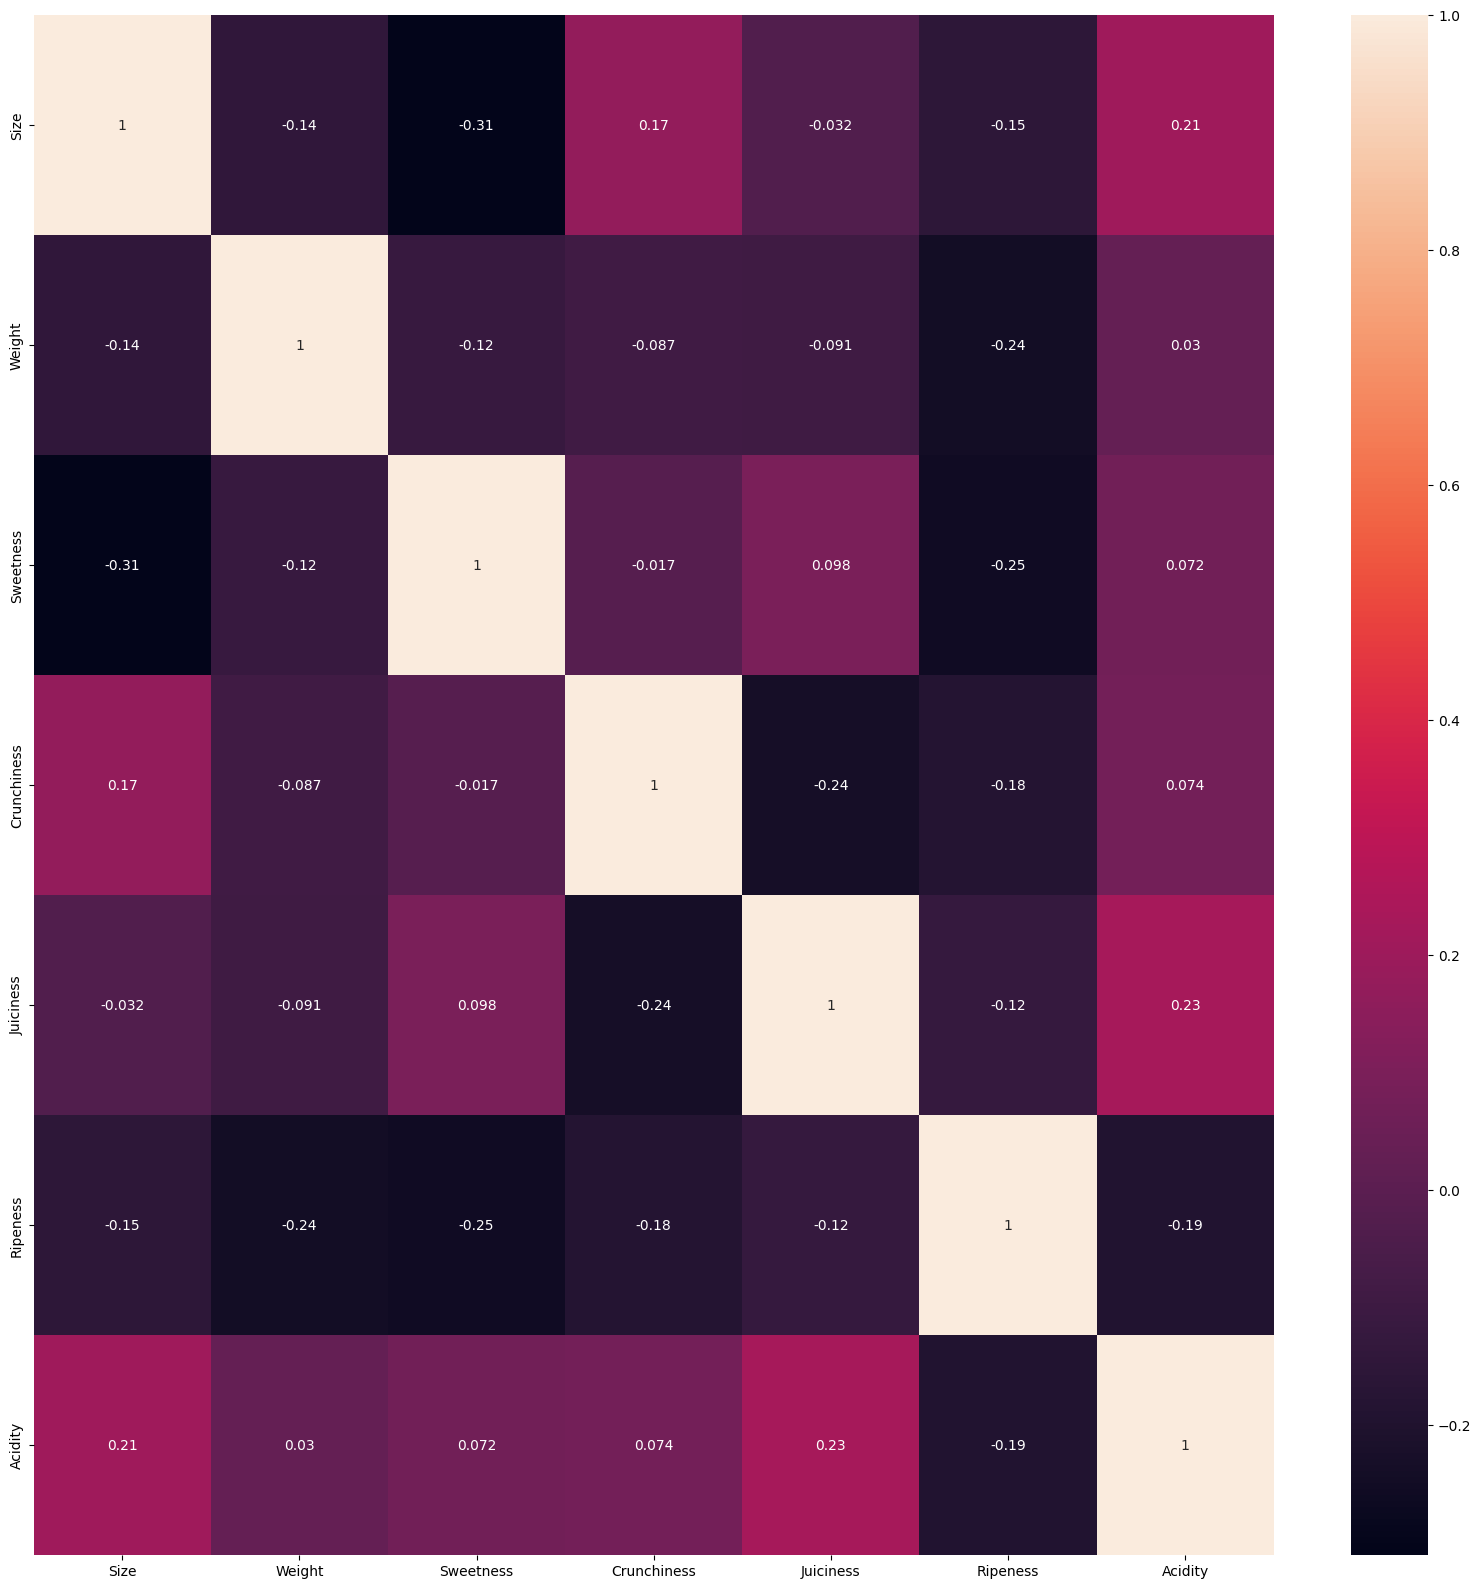

In [15]:
# correlation
corr_f = df.corr(method="spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corr_f, annot=True)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [20]:
num_features = [feature for feature in df.columns if df[feature].dtypes != "O"]

Check the distribution of each feature (Univariate)

Size


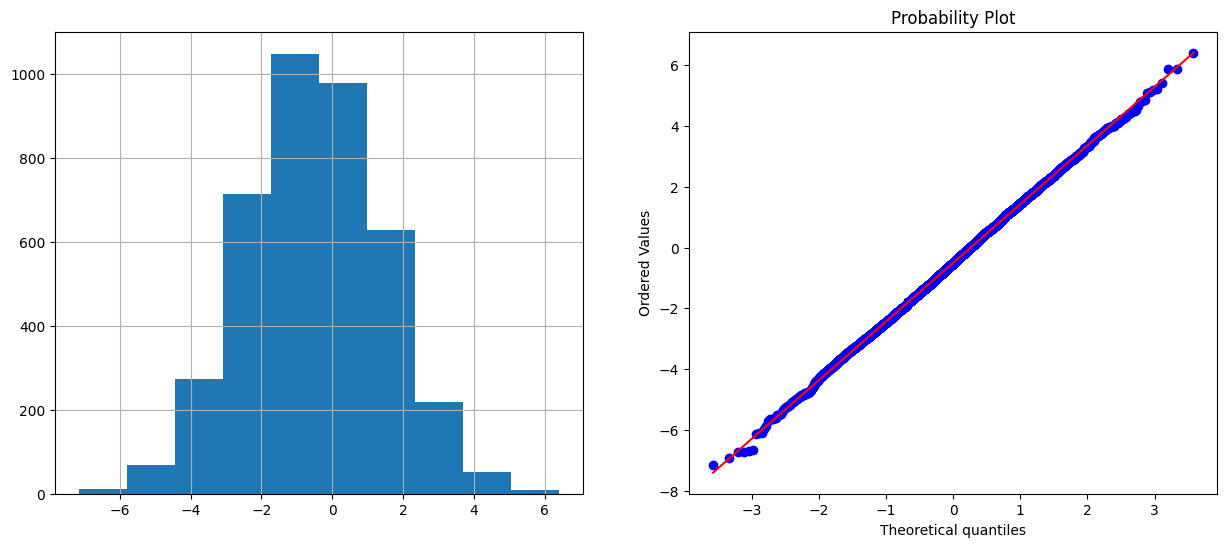

Weight


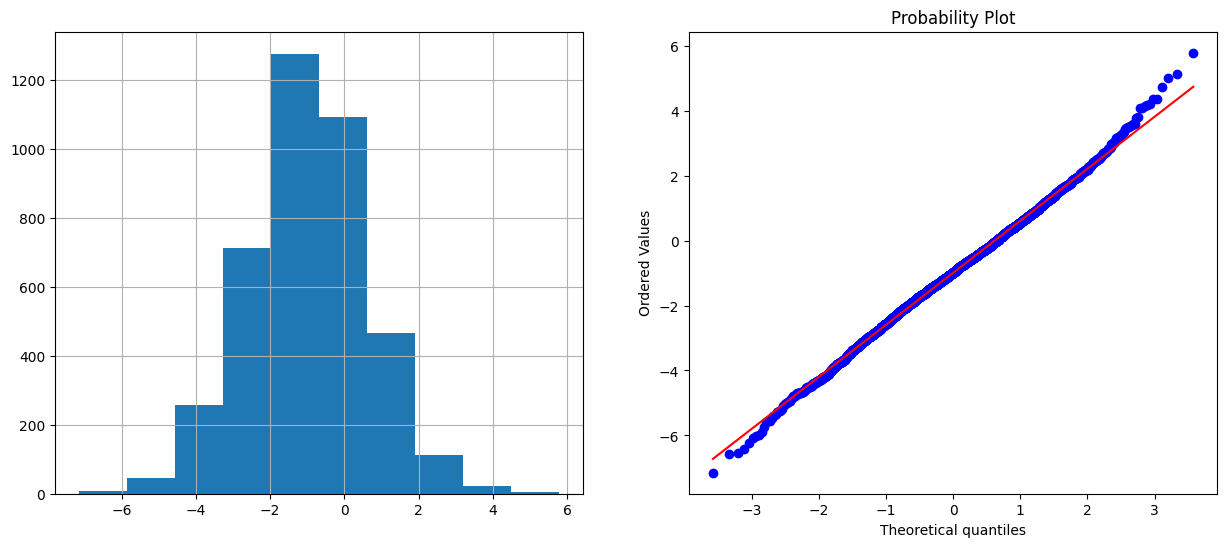

Sweetness


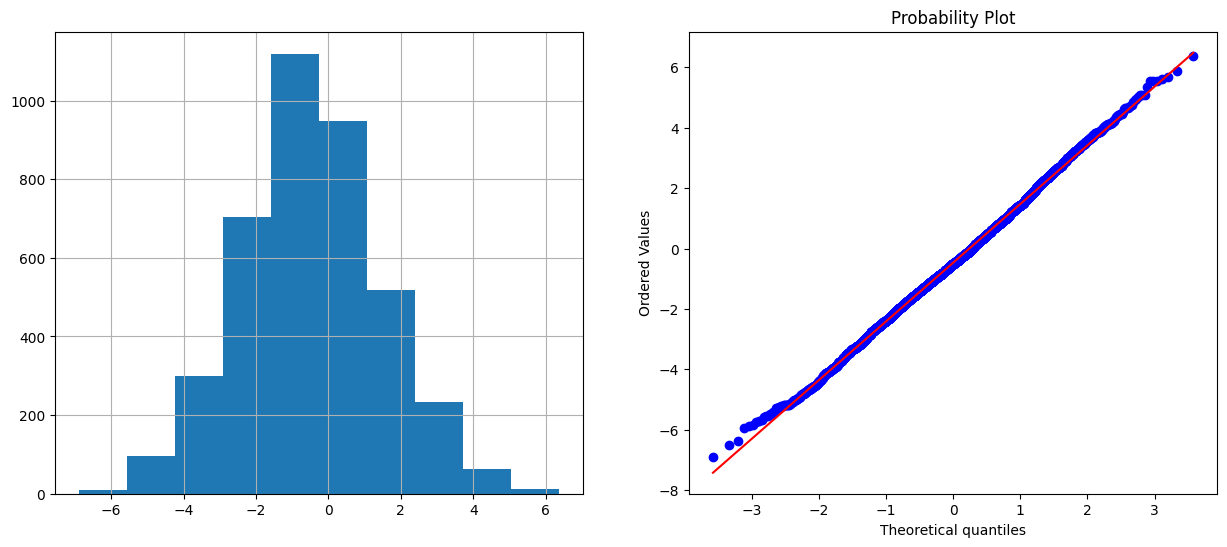

Crunchiness


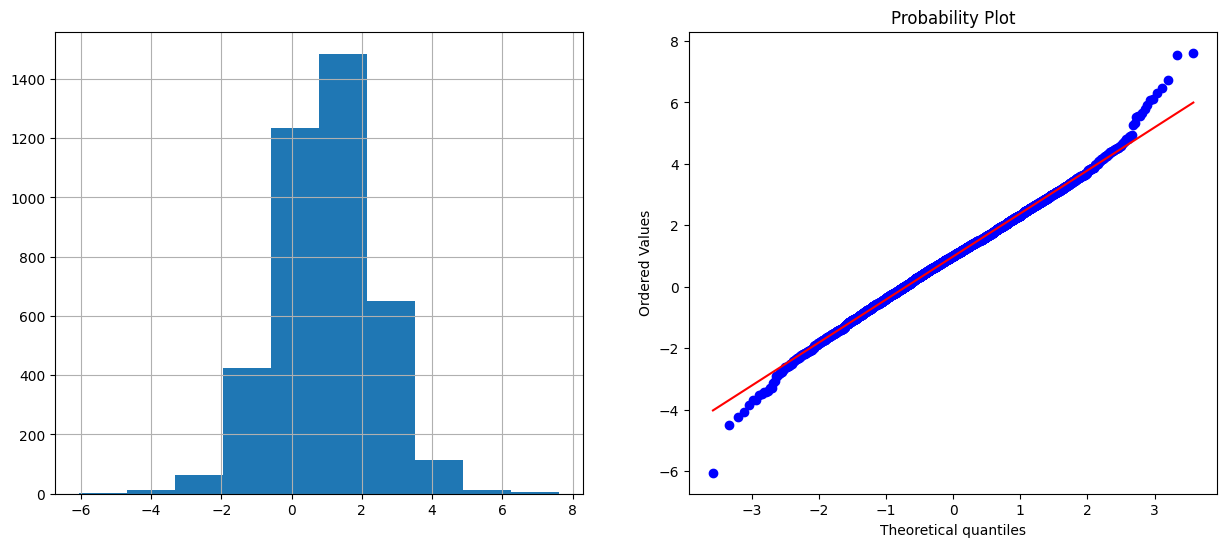

Juiciness


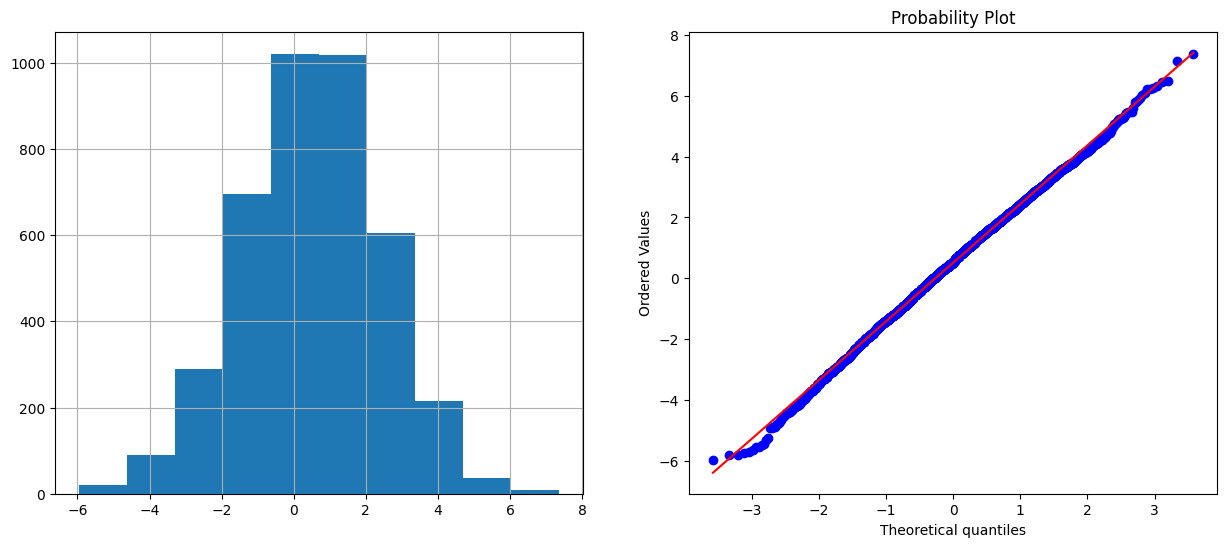

Ripeness


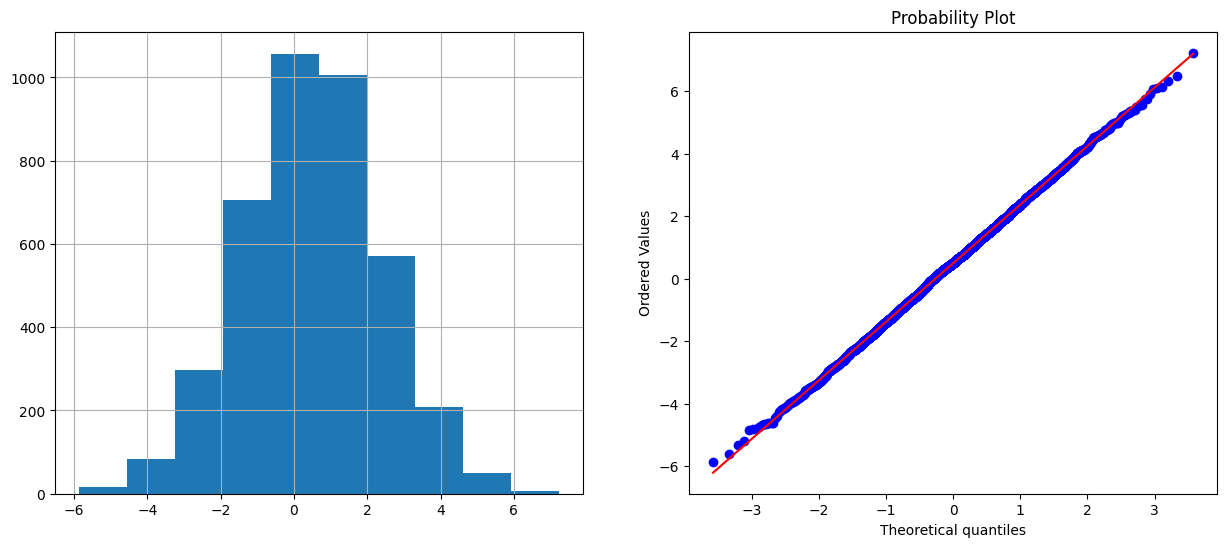

Acidity


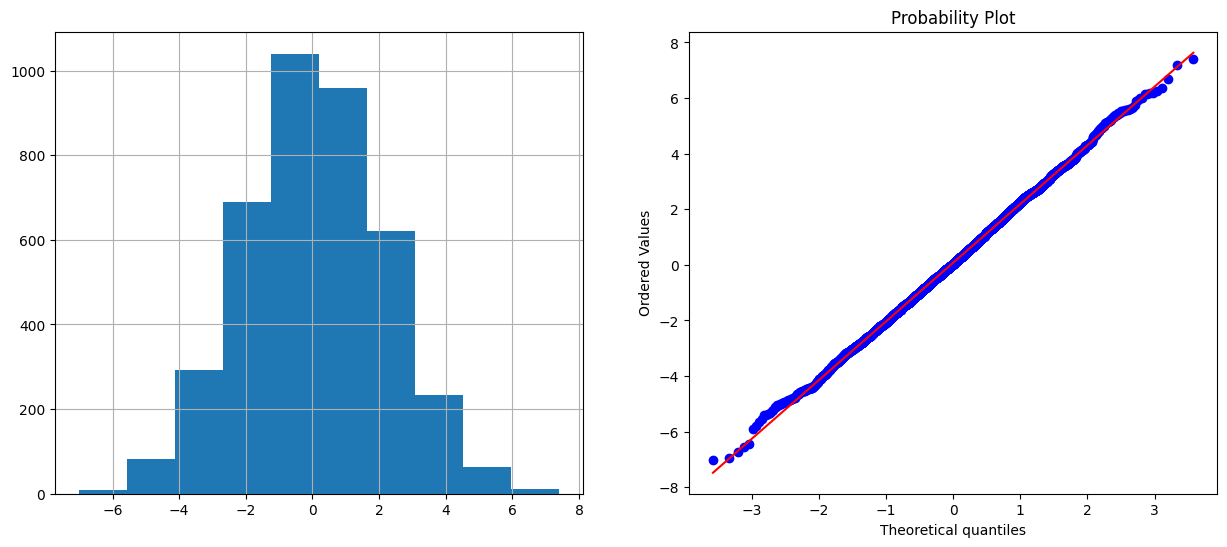

In [22]:
for feature in num_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm',plot=plt)
    plt.show()

In [23]:
import matplotlib.pylab as plb
def normality_of_feature(df, feature):
    plt.figure(figsize=(8,3))
    plt.subplot(1,3,1)
    sns.histplot(df[feature])
    plt.subplot(1,3,2)
    stats.probplot(df[feature], plot=plb)
    plt.subplot(1,3,3)
    sns.boxplot(df[feature])
    plt.title(f'boxplot {feature}')
    plt.show()

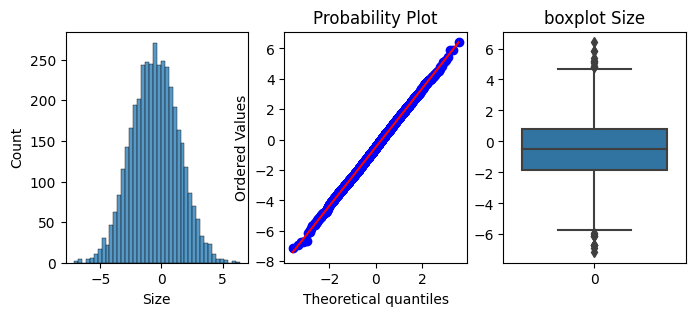

None


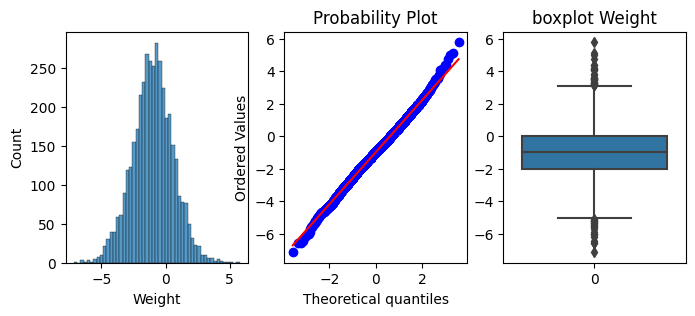

None


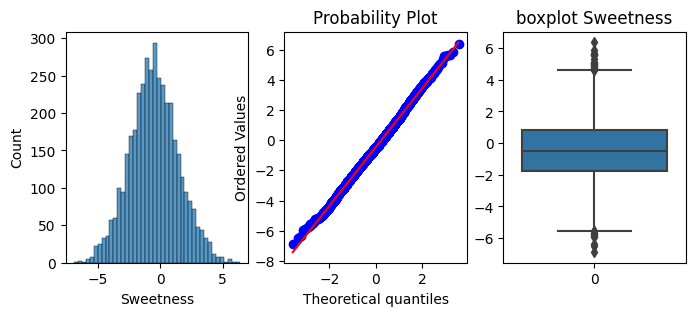

None


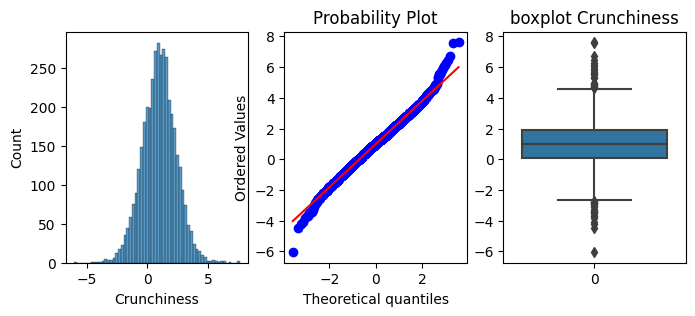

None


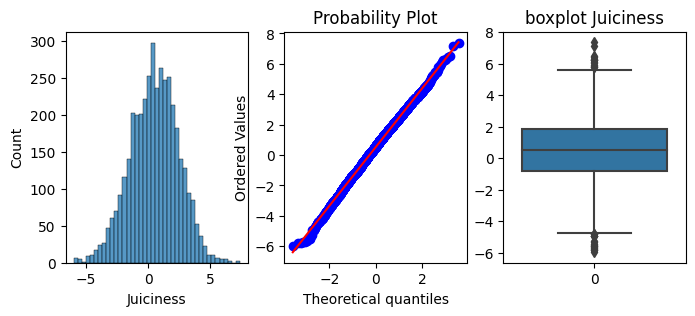

None


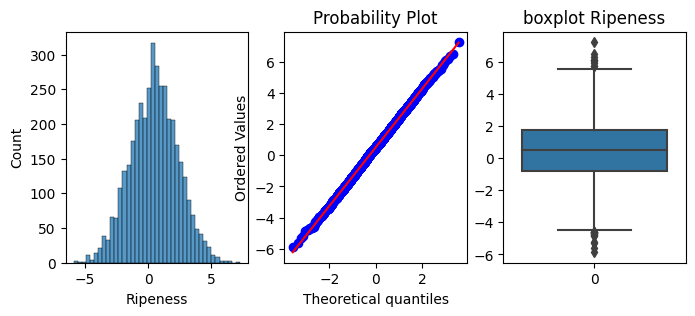

None


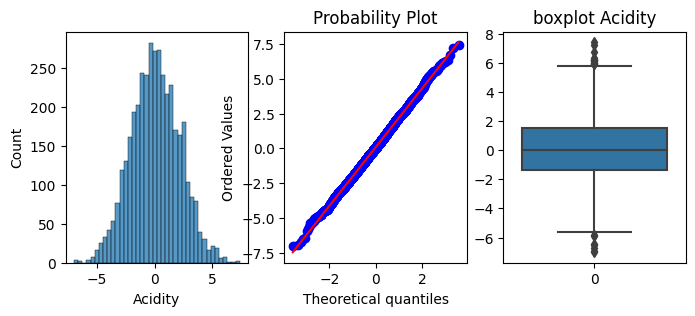

None


In [24]:
for i in num_features:
    print(normality_of_feature(df, i))

<Figure size 800x800 with 0 Axes>

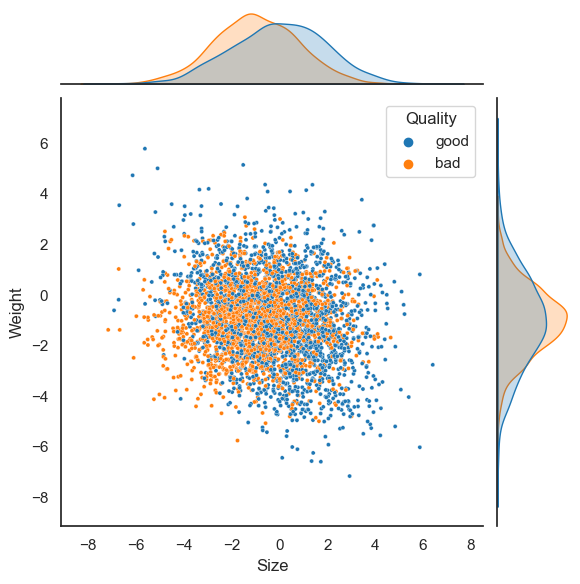

In [26]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Size', y='Weight', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

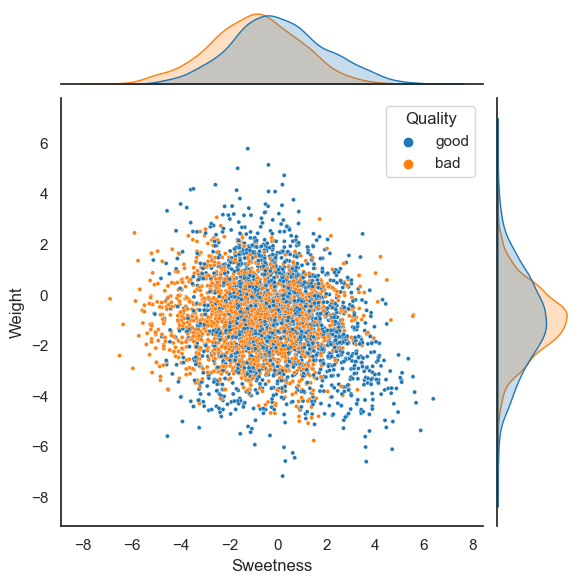

In [28]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Sweetness', y='Weight', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

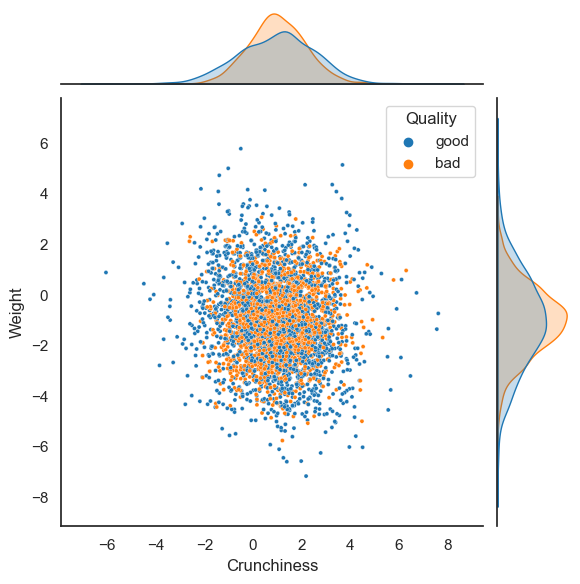

In [29]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Crunchiness', y='Weight', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

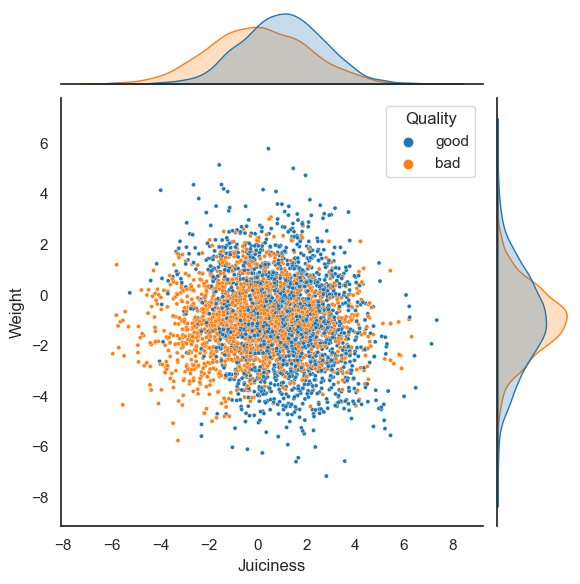

In [31]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Juiciness', y='Weight', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

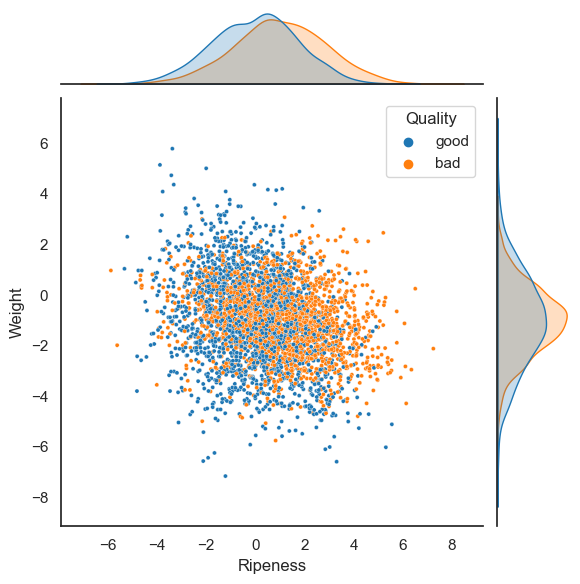

In [32]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Ripeness', y='Weight', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

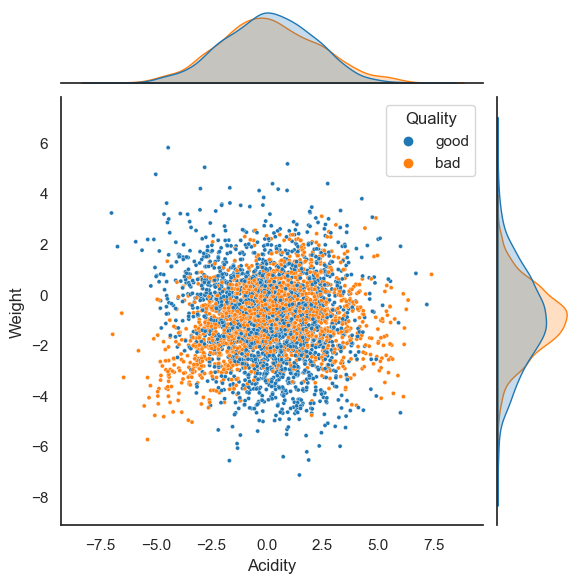

In [33]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Acidity', y='Weight', hue='Quality', data=df, palette='tab10', s=9)